In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
%matplotlib inline
from wavenet import wavenetSC
                

In [2]:
f = 5
d = f*51
#np.random.seed(0)
pi = np.random.permutation(d).reshape(f,51)
pi


array([[172,  31,  52,  88, 244, 112,  50, 224,  47,  57,  29, 235,  72,
        117, 213, 133, 215, 115, 155, 154, 232,   5, 190, 179,   4, 193,
        148, 167,   9,  60, 216, 206,  75,  51, 143, 136, 166, 249,  23,
         64, 100, 147, 107, 106,  34,  80,  70, 105,  24,  87,  37],
       [236, 230, 123, 160,  16,  10, 240, 195, 225,  67,  45,  62, 111,
        101,  44, 222, 231,  39,  30, 137, 227, 250,   0, 168,  84, 126,
         11, 205, 202,   7, 212, 198,  66,  73, 239, 127, 233,  38, 178,
        171,  42,  36, 187, 116,  27, 220, 252, 218, 254, 211, 162],
       [142, 196, 158, 214, 199,  48, 177,  61, 152, 113, 110,  93,  54,
         17, 194,  58, 120, 219,  83, 201,  22, 221, 159, 181, 144,  98,
        135, 185, 164,  14,  74,  12, 170,  68, 125, 121, 186,  33,  65,
         81, 248,  59, 139,  96,  86, 247,  15,  41,  82,   6, 149],
       [242, 210, 174, 156, 237, 173,  89, 245, 203, 138,  43, 153,  95,
         28, 128,  92,  20, 226, 253, 146, 223, 243,  90,  76, 

In [125]:
def generate_signal(fingers, pi, sig=0):
    d = np.prod(pi.shape)+1
    z = np.random.uniform(size=d)
    x = sig*np.random.normal(size=d)
    for f in fingers:
        x[pi[f]] += z[pi[f]]
    return x

def generate_data(n, pi, sig=0, p=np.ones(7)/7):
    d = np.prod(pi.shape)+1
    X = np.zeros(n*d).reshape(n,d)
    y = [0]*n
    for s in np.arange(n):
        this_y = np.random.choice(np.arange(7), p=p)
        if this_y < 5:
            X[s] = generate_signal([this_y], pi, sig)
        elif this_y == 5:
            X[s] = generate_signal([0,1], pi, sig)
        elif this_y == 6:
            X[s] = generate_signal([0,2], pi, sig)
        y[s] = this_y
    y = np.array(y)
    return X, y

def viz_data_point(x, y, pi, filename=''):
    d = len(x)
    z = np.zeros(d)
    if y < 5:
        sample = pi[y]
    elif y == 5:
        sample = np.array(list(pi[0])+list(pi[1]))
    elif y == 6:
        sample = np.array(list(pi[0])+list(pi[2]))
    plt.bar(np.arange(d), height=x)
    plt.plot(sample, [-0.75]*len(sample), '|', color='red')
    if len(filename) > 0:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()
    
def viz_unpermuted_data_point(x, y, pi, filename=''):
    d = len(x)
    z = np.zeros(d)
    if y < 5:
        sample = np.arange(51*y, 51*(y+1))
    elif y == 5:
        sample = np.arange(51*2)
    elif y == 6:
        sample = np.array(list(np.arange(51)) + list(np.arange(51*2, 51*3)))
    pil = list(pi[0]) + list(pi[1]) + list(pi[2]) + list(pi[3]) + list(pi[4])
    plt.bar(np.arange(d-1), height=x[pil])
    plt.plot(sample, [-0.75]*len(sample), '|', color='red')
    if len(filename) > 0:
        plt.savefig(filename, bbox_inches='tight')    
    plt.show()
    #plt.bar(np.arange(d-1), height=z[pil])
    
def viz_data(x, y, pi, filename):
    viz_data_point(x, y, pi, '%s_permuted.pdf' % filename)
    viz_unpermuted_data_point(x, y, pi, '%s_unpermuted.pdf' % filename)


In [105]:
n = 1000
p0 = 0.16
p = [p0, p0, p0, p0, p0, (1-5*p0)/2, (1-5*p0)/2]
X, y = generate_data(n, pi, sig=.3, p=p)
X_test, y_test = generate_data(n, pi, sig=.3, p=p)
p

[0.16, 0.16, 0.16, 0.16, 0.16, 0.09999999999999998, 0.09999999999999998]

In [128]:
y[16]

2

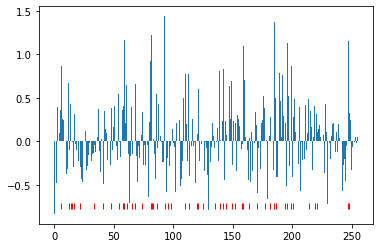

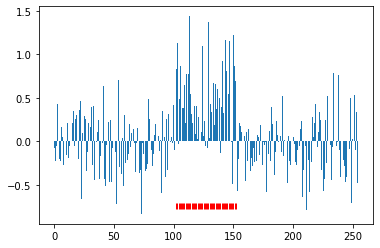

In [129]:
s = 16
this_x = X[s]
this_y = y[s]
viz_data(this_x, this_y, pi, 'finger_example2')
